In [1]:
# importing all modules

import matplotlib, csv, pandas, sys, os, random
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# defining a function that will make the plots look nice

def get_ax(figsize=(8, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

In [3]:
# turning the spreadsheet into a 'dataframe'

all_data = pandas.read_csv(r"C:\Users\tente\OneDrive\Documents\CS638\Madison 1994 - Aug 2020.csv", encoding='latin-1')

c:\users\tente\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
all_data

,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,ONHWY,...,DRVRDO2,TRFCNTL2,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22
0,7314633,01/21/2002,4,SW,DANE,MADISON,C,2.0,E,NaN,...,GO STR,NONE,25.0,0.0,N,,NaN,FVC,,
1,8299574,01/07/2002,15,SW,DANE,MADISON,C,10.0,E,NaN,...,LG PRK,NONE,0.0,0.0,N,,NaN,NaN,,
2,7364679,06/19/2002,15,SW,DANE,MADISON,C,10.0,E,NaN,...,GO STR,NONE,25.0,20.0,M,,SH/LP,NaN,343.44 1 A,
3,9BBDMB6,05/03/2009,1,SW,DANE,MADISON,C,12.0,E,012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9BG0RZB,11/25/2012,0,SW,DANE,MADISON,C,12.0,E,012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127212,9B8CW4D,06/15/2016,20,SW,DANE,MADISON,C,NaN,NaN,NaN,...,LG PRK,NONE,35.0,0.0,N,,NaN,NaN,,
127213,5988688,01/29/1996,17,SW,DANE,MADISON,C,NaN,NaN,NaN,...,RT TRN,NONE,25.0,57.0,M,,SH/LP,FVC,,
127214,9BBBF61,08/10/2016,7,SW,DANE,MADISON,C,NaN,NaN,NaN,...,LG PRK,NONE,25.0,0.0,N,,NaN,NaN,,
127215,6684284,08/01/1999,19,SW,DANE,MADISON,C,NaN,NaN,NaN,...,GO STR,NONE,25.0,51.0,M,,SH/LP,DC,346.63 1 A,


In [5]:
# Goal: look at how many collisions, injuries and fatalities occured at each road
# eg: S GAMMON RD -> {collisions -> number, injuries -> number, fatalites -> number}

# create a dictionary with roads as the keys, dictionary of collisions ... as values
road_dict = {}

# loop over the all of the data
for i, row in all_data[['ATSTR', 'ONSTR', 'TOTINJ', 'TOTFATL']].iterrows():
    
    # get the data points as variables
    street1 = row[0]
    street2 = row[1]
    num_inj = row[2]
    num_fatl = row[3]
    
    # new street -> create new dict
    if street1 not in road_dict:
        road_dict[street1] = {}
        road_dict[street1]['Collisions'] = 1
        road_dict[street1]['Injuries'] = num_inj
        road_dict[street1]['Fatalities'] = num_fatl
    
    # not new street -> change existing dict
    else:
        road_dict[street1]['Collisions'] += 1
        road_dict[street1]['Injuries'] += num_inj
        road_dict[street1]['Fatalities'] += num_fatl
    
    # new street -> create new dict
    if street2 not in road_dict:
        road_dict[street2] = {}
        road_dict[street2]['Collisions'] = 1
        road_dict[street2]['Injuries'] = num_inj
        road_dict[street2]['Fatalities'] = num_fatl
    
    # not new street -> change the dict
    else:
        road_dict[street2]['Collisions'] += 1
        road_dict[street2]['Injuries'] += num_inj
        road_dict[street2]['Fatalities'] += num_fatl

In [6]:
# turn the dict of dicts into a dataframe

road_df = DataFrame.from_dict(road_dict, orient='index')
road_df

,Collisions,Injuries,Fatalities
CORRY ST,82,32,0
MILWAUKEE ST,2611,1168,11
BELD ST,168,91,1
W WINGRA DR,205,111,0
CHANDLER ST,178,69,0
...,...,...,...
ZIEIR RD,1,0,0
ZIEN RD,1,1,0
ZIERE RD,2,0,0
ZIERON RD,1,0,0


In [7]:
# sort the df by number of collisions

road_df = road_df.sort_values(by='Collisions', ascending = False)
road_df

,Collisions,Injuries,Fatalities
NaN,23683,10045,69
E WASHINGTON AVE,11233,6044,23
MINERAL POINT RD,5335,2611,10
UNIVERSITY AVE,5181,2520,8
S PARK ST,3897,1950,6
...,...,...,...
E WASHTINGTON AVE,1,0,0
E WASHNGTON AVE,1,0,0
E WASHINGTON DR,1,0,0
COLUMBUX LN,1,2,0


In [8]:
# get rid of bad / unhelpful data

road_df = road_df.tail(-1)
road_df

,Collisions,Injuries,Fatalities
E WASHINGTON AVE,11233,6044,23
MINERAL POINT RD,5335,2611,10
UNIVERSITY AVE,5181,2520,8
S PARK ST,3897,1950,6
S GAMMON RD,3839,1845,2
...,...,...,...
E WASHTINGTON AVE,1,0,0
E WASHNGTON AVE,1,0,0
E WASHINGTON DR,1,0,0
COLUMBUX LN,1,2,0


In [9]:
# look at top 10

road_df = road_df.head(10)
road_df

,Collisions,Injuries,Fatalities
E WASHINGTON AVE,11233,6044,23
MINERAL POINT RD,5335,2611,10
UNIVERSITY AVE,5181,2520,8
S PARK ST,3897,1950,6
S GAMMON RD,3839,1845,2
S STOUGHTON RD,3153,1750,3
E JOHNSON ST,3149,1519,1
REGENT ST,2944,1327,1
S WHITNEY WAY,2907,1397,6
W JOHNSON ST,2823,1296,2


In [10]:
# set units to be 1000s

road_df['Collisions'] = road_df['Collisions'] / 1000
road_df['Injuries'] = road_df['Injuries'] / 1000
road_df['Fatalities'] = road_df['Fatalities'] / 1000

road_df

<ipython-input-10-e33ae496316f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_df['Collisions'] = road_df['Collisions'] / 1000
<ipython-input-10-e33ae496316f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_df['Injuries'] = road_df['Injuries'] / 1000
<ipython-input-10-e33ae496316f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Collisions,Injuries,Fatalities
E WASHINGTON AVE,11.233,6.044,0.023
MINERAL POINT RD,5.335,2.611,0.010
UNIVERSITY AVE,5.181,2.520,0.008
S PARK ST,3.897,1.950,0.006
S GAMMON RD,3.839,1.845,0.002
S STOUGHTON RD,3.153,1.750,0.003
E JOHNSON ST,3.149,1.519,0.001
REGENT ST,2.944,1.327,0.001
S WHITNEY WAY,2.907,1.397,0.006
W JOHNSON ST,2.823,1.296,0.002


<AxesSubplot:>

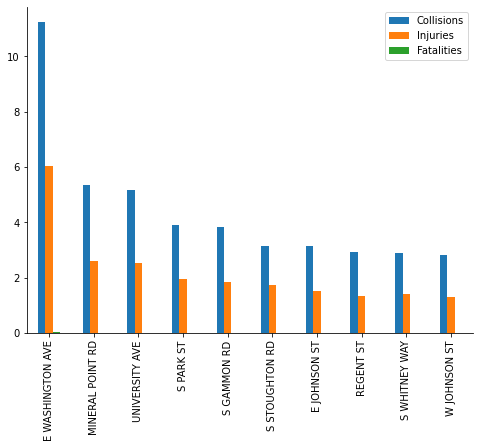

In [11]:
# plot the data

ax=get_ax()
road_df.plot.bar(ax=ax)

<AxesSubplot:>

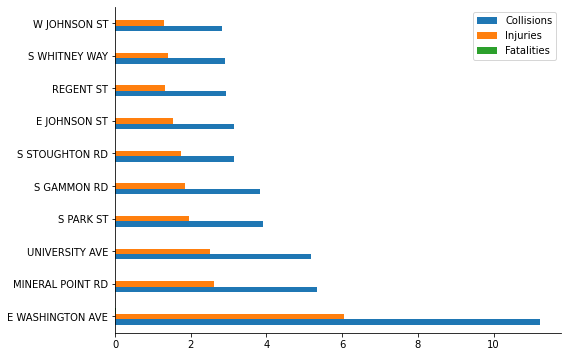

In [12]:
# horizontal

ax=get_ax()
road_df.plot.barh(ax=ax)

<AxesSubplot:>

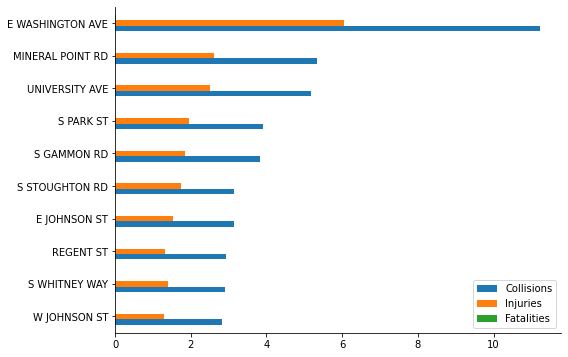

In [13]:
# horizontal with e wash on top

ax=get_ax()
road_df = road_df.sort_values(by='Collisions')
road_df.plot.barh(ax=ax)

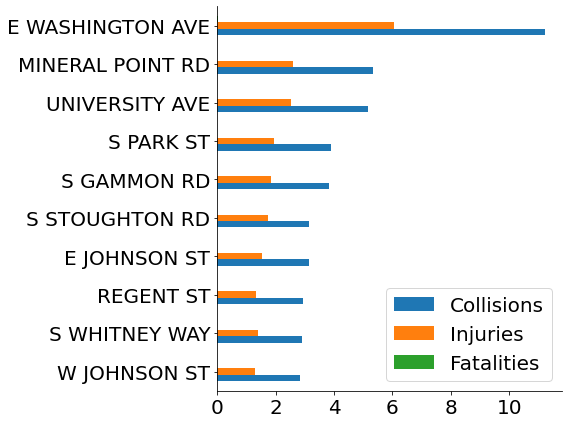

In [14]:
# increase font size

ax=get_ax()
road_df = road_df.sort_values(by='Collisions')
road_df.plot.barh(ax=ax)

ax.legend(fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.tight_layout()

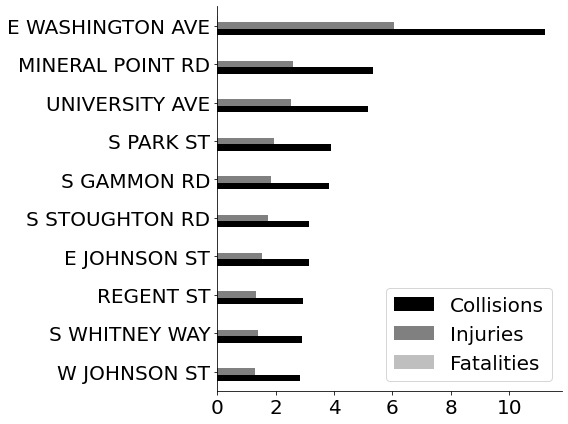

In [15]:
# grey scale

ax=get_ax()
road_df = road_df.sort_values(by='Collisions')
road_df.plot.barh(ax=ax, color=['0', '0.5', '0.75'])

ax.legend(fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()

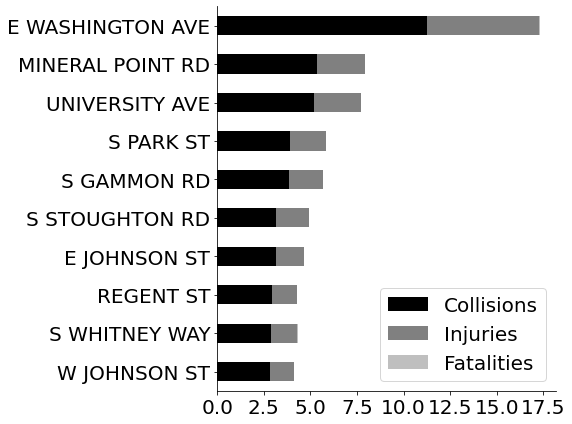

In [16]:
# stacked

ax=get_ax()
road_df = road_df.sort_values(by='Collisions')
road_df.plot.barh(ax=ax, color=['0', '0.5', '0.75'], stacked=True)

ax.legend(fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()

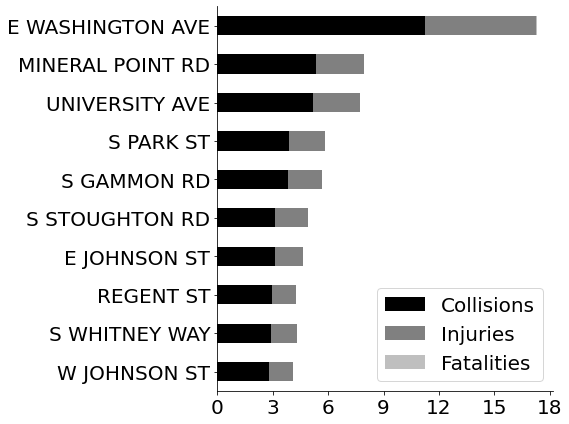

In [17]:
# custom x-ticks

ax=get_ax()
road_df = road_df.sort_values(by='Collisions')
road_df.plot.barh(ax=ax, color=['0', '0.5', '0.75'], stacked=True)

ax.legend(fontsize=20)
plt.xticks([0, 3, 6, 9, 12, 15, 18], size=20)
plt.yticks(size=20)

plt.tight_layout()

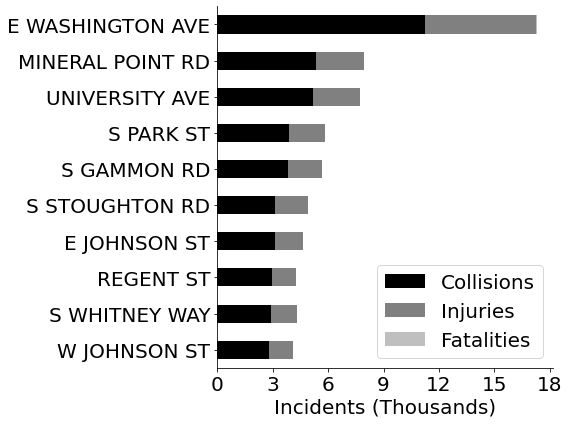

In [18]:
# label

ax=get_ax()
road_df = road_df.sort_values(by='Collisions')
road_df.plot.barh(ax=ax, color=['0', '0.5', '0.75'], stacked=True)

ax.legend(fontsize=20)
plt.xticks([0, 3, 6, 9, 12, 15, 18], size=20)
plt.yticks(size=20)

ax.set_xlabel('Incidents (Thousands)', size = 20)

plt.tight_layout()

In [19]:
all_data

,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,ONHWY,...,DRVRDO2,TRFCNTL2,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22
0,7314633,01/21/2002,4,SW,DANE,MADISON,C,2.0,E,NaN,...,GO STR,NONE,25.0,0.0,N,,NaN,FVC,,
1,8299574,01/07/2002,15,SW,DANE,MADISON,C,10.0,E,NaN,...,LG PRK,NONE,0.0,0.0,N,,NaN,NaN,,
2,7364679,06/19/2002,15,SW,DANE,MADISON,C,10.0,E,NaN,...,GO STR,NONE,25.0,20.0,M,,SH/LP,NaN,343.44 1 A,
3,9BBDMB6,05/03/2009,1,SW,DANE,MADISON,C,12.0,E,012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9BG0RZB,11/25/2012,0,SW,DANE,MADISON,C,12.0,E,012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127212,9B8CW4D,06/15/2016,20,SW,DANE,MADISON,C,NaN,NaN,NaN,...,LG PRK,NONE,35.0,0.0,N,,NaN,NaN,,
127213,5988688,01/29/1996,17,SW,DANE,MADISON,C,NaN,NaN,NaN,...,RT TRN,NONE,25.0,57.0,M,,SH/LP,FVC,,
127214,9BBBF61,08/10/2016,7,SW,DANE,MADISON,C,NaN,NaN,NaN,...,LG PRK,NONE,25.0,0.0,N,,NaN,NaN,,
127215,6684284,08/01/1999,19,SW,DANE,MADISON,C,NaN,NaN,NaN,...,GO STR,NONE,25.0,51.0,M,,SH/LP,DC,346.63 1 A,


In [20]:
# Goal same as before but with year as the key not streets

# create the dict
year_dict = {}

# loop over the data set
for i, row in all_data[['ACCDDATE', 'TOTINJ', 'TOTFATL']].iterrows():
    # get data as variables
    date = row[0]
    year = int(date[-4:])
    num_inj = row[1]
    num_fatl = row[2]
    
    # new year -> create new dict
    if year not in year_dict:
        year_dict[year] = {}
        year_dict[year]['Collisions'] = 1
        year_dict[year]['Injuries'] = num_inj
        year_dict[year]['Fatalities'] = num_fatl
    
    # not new year -> change existing dict
    else:
        year_dict[year]['Collisions'] += 1
        year_dict[year]['Injuries'] += num_inj
        year_dict[year]['Fatalities'] += num_fatl        

In [21]:
# turn into a dataframe

year_df = DataFrame.from_dict(year_dict, orient='index')
year_df

,Collisions,Injuries,Fatalities
2002,4870,2582,16
2009,4693,1963,14
2012,4711,1712,8
2003,5059,2515,15
2004,4767,2601,14
2011,4885,1832,13
2000,5234,2853,12
1999,4475,2689,3
2010,4973,1924,11
2018,5065,1722,7


In [22]:
# sort chronologically

year_df = year_df.sort_index()
year_df

,Collisions,Injuries,Fatalities
1994,5146,2603,14
1995,4872,2743,9
1996,4635,2631,7
1997,4601,2645,4
1998,4608,2725,9
1999,4475,2689,3
2000,5234,2853,12
2001,4720,2564,7
2002,4870,2582,16
2003,5059,2515,15


<AxesSubplot:>

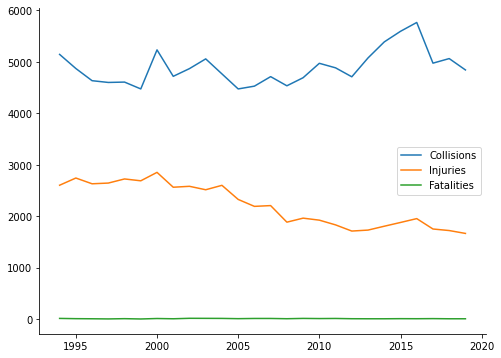

In [23]:
# plot the data

ax=get_ax()
year_df.plot(ax=ax)

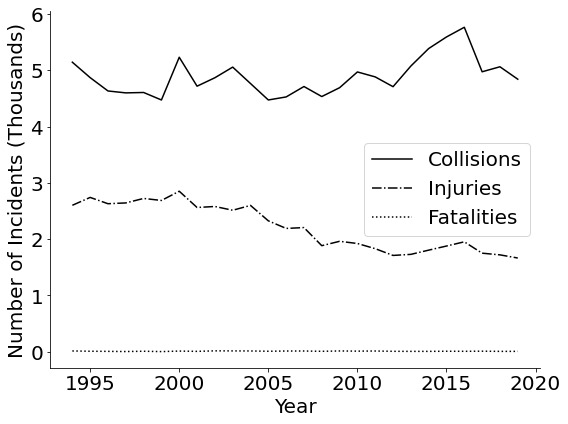

In [24]:
# make it look nicer

year_df['Collisions'] = year_df['Collisions']/1000
year_df['Injuries'] = year_df['Injuries']/1000
year_df['Fatalities'] = year_df['Fatalities']/1000

ax=get_ax()
year_df['Collisions'].plot(ax=ax, color='0')
year_df['Injuries'].plot(ax=ax, color='0', style='-.')
year_df['Fatalities'].plot(ax=ax, color='0', style=':')

plt.xticks(size=20)
ax.set_xlabel('Year', size=20)
ax.set_ylabel('Number of Incidents (Thousands)', size=20)
plt.yticks(size=20)


ax.legend(fontsize=20)

plt.tight_layout()



In [25]:
# Goal: produce a plot that predicts the number of injuries prevented with 5% reduction in collisions

# add injury rate column to year_df
year_df['Injury Rate'] = year_df['Injuries'] / year_df['Collisions']
year_df

,Collisions,Injuries,Fatalities,Injury Rate
1994,5.146,2.603,0.014,0.505830
1995,4.872,2.743,0.009,0.563013
1996,4.635,2.631,0.007,0.567638
1997,4.601,2.645,0.004,0.574875
1998,4.608,2.725,0.009,0.591363
1999,4.475,2.689,0.003,0.600894
2000,5.234,2.853,0.012,0.545090
2001,4.720,2.564,0.007,0.543220
2002,4.870,2.582,0.016,0.530185
2003,5.059,2.515,0.015,0.497134


In [26]:
# create an injury sim df
injsim_df = DataFrame()

# get the years df out of units of thousands
year_df['Collisions'] = year_df['Collisions'] * 1000
year_df['Injuries'] = year_df['Injuries'] * 1000
year_df['Fatalities'] = year_df['Fatalities'] * 1000

# create lists that we can pull random values from
injrate_lst = list(year_df['Injury Rate'])
colnum_lst = list(year_df['Collisions'])

# take a random number of collisions and multiply by a random injury rate 1000 times
for i in range(1000):
    # 10 year projection
    rates = random.choices(injrate_lst, k=10)
    collisions = random.choices(colnum_lst, k=10)
    
    # get random num of injuries
    injnums = Series(collisions) * Series(injrate_lst)
    
    # same as above but with 5% fewer collisions
    injnums95 = Series(collisions) * Series(injrate_lst) * 0.95
    
    # add the difference to the df
    injsim_df['sim diff' + str(i)] = Series(injnums-injnums95).cumsum()


In [27]:
injsim_df = injsim_df.head(10)

In [28]:
injsim_df

,sim diff0,sim diff1,sim diff2,sim diff3,sim diff4,sim diff5,sim diff6,sim diff7,sim diff8,sim diff9,...,sim diff990,sim diff991,sim diff992,sim diff993,sim diff994,sim diff995,sim diff996,sim diff997,sim diff998,sim diff999
0,113.179411,123.548921,145.856014,118.692956,123.220132,116.543179,119.375826,120.564526,117.226049,132.375651,...,114.722192,116.366139,145.856014,119.375826,118.692956,119.224077,114.722192,132.375651,136.295832,123.169549
1,245.881607,260.698921,303.358939,244.667145,249.194321,256.536396,247.067205,278.067451,268.929939,268.737433,...,266.426082,248.477171,288.270187,255.737607,261.641991,255.585859,245.200486,262.093878,276.373500,257.363730
2,376.466624,387.707821,462.155541,382.886886,393.317493,397.764616,395.617950,406.807645,397.471460,402.699892,...,404.702586,377.018692,419.053877,386.521297,396.938399,386.170875,378.396635,399.575690,404.915021,403.416869
3,524.381968,526.942553,597.653585,519.908349,528.211918,533.435122,528.069156,541.702070,552.371536,538.370399,...,544.684656,509.268692,564.468515,521.415722,542.525499,516.552531,544.161849,542.604597,547.943928,539.087376
4,661.430308,666.238071,747.800612,656.956689,664.461918,683.020354,672.509531,675.616187,696.368389,685.412771,...,684.068879,664.028349,714.231156,673.573383,697.285157,659.780613,681.210189,681.900115,698.090955,686.218452
5,810.842565,818.414440,887.057763,793.029102,810.779572,826.243404,824.505632,828.183136,837.368132,837.589139,...,841.322800,813.440606,848.681156,822.985640,839.096106,811.956981,830.712580,817.972529,850.657904,827.849134
6,943.626440,941.850025,1010.684129,935.679102,934.405938,959.027279,954.427785,950.146979,963.692693,961.215505,...,988.197246,941.345927,972.307522,960.866104,967.573771,949.837445,952.676422,950.701894,983.796087,968.100739
7,1100.264024,1079.257610,1152.844892,1060.837068,1062.605938,1082.039525,1083.904353,1085.300199,1096.021167,1096.368726,...,1127.967840,1087.716648,1112.078115,1096.019324,1099.847924,1077.874479,1082.152990,1082.976047,1105.341638,1124.738323
8,1220.509938,1204.381223,1295.703187,1194.947315,1184.574952,1216.149771,1208.789384,1207.269213,1248.899956,1249.247514,...,1246.596690,1207.776997,1236.963146,1225.119324,1222.718253,1202.282344,1200.781840,1201.604897,1230.306197,1249.861937
9,1344.196833,1321.555665,1412.877629,1325.047235,1314.674873,1355.222958,1347.862570,1318.502906,1363.265591,1367.739360,...,1370.209014,1322.987760,1349.713096,1353.031856,1335.468203,1323.707280,1313.357794,1315.970533,1351.407996,1388.935124


In [29]:
# want to find the 5th, 95th percentiles and the median and plot those

#start the lists
upper_lst = [0]
med_lst = [0]
lower_lst = [0]
year_lst = [0]

# loop through injsim_df and find the values
for i in range(len(injsim_df)):
    year_lst.append(i + 1)
    upper_lst.append(np.percentile(injsim_df.iloc[i], 95))
    med_lst.append(injsim_df.iloc[i].median())
    lower_lst.append(np.percentile(injsim_df.iloc[i], 5))

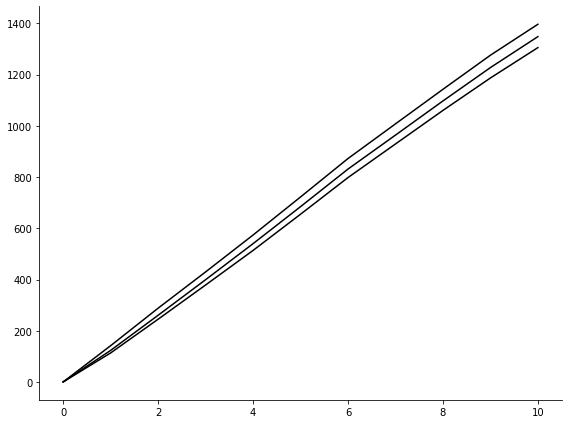

In [30]:
# plot

ax=get_ax()

plt.plot(year_lst, upper_lst, color='0')
plt.plot(year_lst, med_lst, color='0')
plt.plot(year_lst, lower_lst, color='0')

plt.tight_layout()

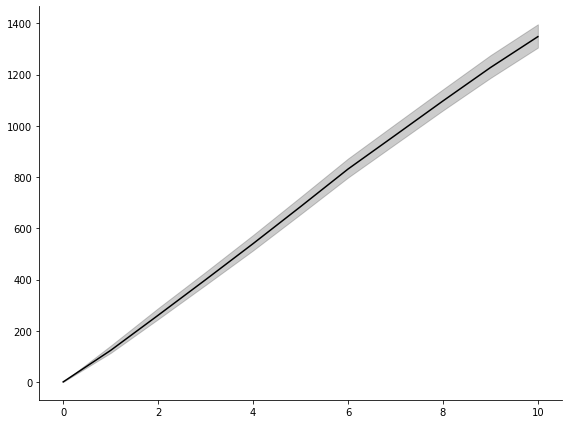

In [31]:
# fill between the 5th, 95th percentiles

ax=get_ax()

plt.plot(year_lst, med_lst, color='0')
plt.fill_between(year_lst, lower_lst, upper_lst, color='0', alpha=0.2)

plt.tight_layout()

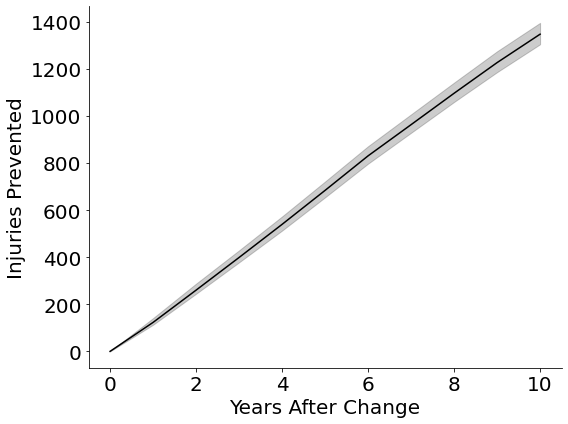

In [32]:
# make it look nice

ax=get_ax()

plt.plot(year_lst, med_lst, color='0')
plt.fill_between(year_lst, lower_lst, upper_lst, color='0', alpha=0.2)

plt.xticks(size=20)
plt.yticks(size=20)

plt.xlabel('Years After Change', size=20)
plt.ylabel('Injuries Prevented', size=20)

plt.tight_layout()